# Examen parcial 2 (raizes y ~interpolacion)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10am del 04.03.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

# Ejercicio

Bajo ciertas condiciones, los dispositivos ópticos como los láseres pueden mostrar un comportamiento complejo en el perfil del rayo de luz.


<table><tr>
<td> <img src="imgs/nonlinear_behaviour.png" width="600" /> </td>
</tr></table>
 
Para un dispositivo óptico particular que consiste en un medio no lineal dentro de una cavidad óptica, esto sólo ocurre cuando la intensidad I se encuentra dentro de un cierto rango que está dado por la ecuación: 

$$f(x)=(x+1)^2 - c(x-1) < 0 $$

donde $x$ es la intensidad del campo eléctrico y $c$ es la fuerza de la absorción del 
medio no lineal. 

## 1. 
Cree una función llamada `f_cost` que reciba dos parámetros (x,c) y solo devuelva la función f(x) como se mencionó anteriormente.

In [1]:
def f_cost(x,c):
  f=(((x+1)**2)-c*(x-1))
  return f

In [2]:
f_cost(2,3)

6

## 2. 
Usando funcion `f_cost` haz un gráfico con cuatro curvas para c=5,10,15,20 y con x entre -10,20 (100 puntos)
* hacer que cada curva sea de un color diferente
* añadir etiquetas

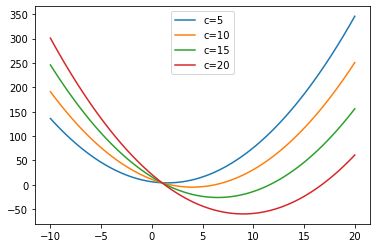

In [3]:
# tu codigo:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.optimize as optimize


x=np.linspace(-10,20,100)
c=[5,10,15,20]
r=[]

for j in c:
  result=f_cost(x,j)
  r.append(result)
  plt.plot(x, result, label="c={}".format(j))
  plt.legend()


## 2a. Para cual `c` esta funcion no tiene raices?

In [4]:
# tu respuesta
print("La función no tiene raices para un c=5")


La función no tiene raices para un c=5


## 3. 
Cree una función llamada `root_finding()` que devuelva el valor de la raíz (si existiera) para cada parametro `c` (pense `Newton` o `bisecion`). Usando esta funcion vamos a buscar primero raiz izquierda y despues raiz derecha.

In [5]:
# tu codigo:
x=np.linspace(-10,20,50)
c=np.arange(5,21,5)
def root_finding(f_cost,start,final,c):
   try:
     root=optimize.brentq(f_cost,start,final,args=(c,))
   except:
     root=np.nan
   return root 

## 4a. 
Primero vamos a mirar el comportamiento de raiz de lado izquierda: Defina el vector `c_vec` que contiene 50 valores de 5 a 100. En el loop, llame a la función `root_finding()` para cada valor `c` en el vector `c_vec`. Guarda los resultados en variable `left_roots`

In [6]:
# tu codigo:

izquierda=[]
start=-5
final=5
c_vec=np.linspace(5,100,50)

for c in c_vec:
  try:
    root=root_finding(f_cost,start,final,c)
  except:
    root:np.nan
  izquierda.append(root)

izquierda=np.array(izquierda)
izquierda

array([       nan,        nan,        nan, 1.6485298 , 1.48358737,
       1.38813305, 1.32500106, 1.27988581, 1.24593793, 1.21942389,
       1.19812148, 1.18062026, 1.16597974, 1.15354772, 1.14285714,
       1.13356454, 1.12541152, 1.11819987, 1.11177498, 1.10601441,
       1.10081994, 1.09611186, 1.09182476, 1.08790449, 1.08430582,
       1.08099068, 1.07792678, 1.07508656, 1.07244635, 1.06998574,
       1.06768696, 1.06553455, 1.06351495, 1.06161622, 1.05982781,
       1.05814038, 1.0565456 , 1.05503603, 1.05360503, 1.05224661,
       1.05095537, 1.04972646, 1.04855547, 1.04743838, 1.04637157,
       1.04535171, 1.04437576, 1.04344095, 1.04254474, 1.04168477])

## 4b 
Hacer un gráfico de raíz izquierda vs c

Text(0, 0.5, ' raiz')

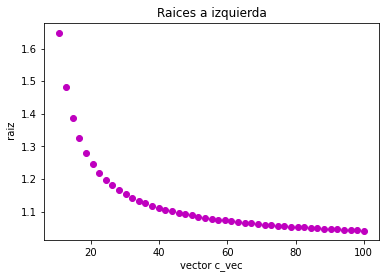

In [7]:
# tu codigo:
plt.plot(c_vec,izquierda, "mo")
plt.title("Raices a izquierda")
plt.xlabel("vector c_vec")
plt.ylabel(" raiz")

## 5a. 
Ahora vamos a mirar el comportamiento de raiz de lado derecha: Defina el vector `c_vec` que contiene 50 valores de 5 a 100. En el loop, llame a la función `root_finding()` para cada valor `c` en el vector `c_vec`. Guarda los resultados en variable `right_roots`.

In [8]:
# tu codigo:

derecha=[]
start=5
final=200
c_vec=np.linspace(5,100,50)

for c in c_vec:
  try:
    root=root_finding(f_cost,start,final,c)
  except:
    root:np.nan
  derecha.append(root)

derecha=np.array(derecha)
derecha


array([        nan,         nan,         nan,  7.16779673,  9.27151467,
       11.30574451, 13.307652  , 15.29154276, 17.26426615, 19.2295557 ,
       21.18963363, 23.14591036, 25.09932638, 27.05053392, 29.        ,
       30.94806811, 32.89499664, 34.8409838 , 36.7861842 , 38.73072029,
       40.67469026, 42.61817386, 44.56123647, 46.50393224, 48.44630642,
       50.38839707, 52.33023649, 54.27185222, 56.21326793, 58.15450406,
       60.09557835, 62.03650627, 63.97730138, 65.91797562, 67.85853954,
       69.79900248, 71.73937277, 73.67965785, 75.61986436, 77.55999829,
       79.50006504, 81.44006946, 83.38001596, 85.31990856, 87.25975088,
       89.19954625, 91.13929771, 93.07900803, 95.01867975, 96.95831523])

## 5b
* Hacer un gráfico de raíz derecha vs c

Text(0, 0.5, ' raiz')

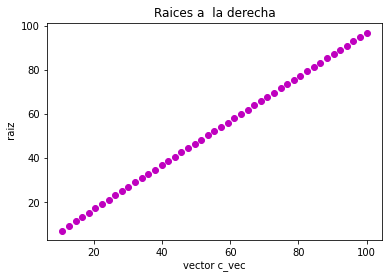

In [9]:
# tu codigo:
plt.plot(c_vec,derecha, "mo")
plt.title("Raices a  la derecha")
plt.xlabel("vector c_vec")
plt.ylabel(" raiz")


## 6. 
Pregunta:
* este cierto *rango* para cual se obtiene un comportamiento complejo esta convergente o divergente cuando `c` es creciente
* si este rango esta convergiendo, ¿a qué valor?
* si este rango esta divergente, como esta divergente (lineal, cuadrático, diferente)

In [10]:
# respuesta:


#La funcion converge a aproximadamente 1.04 a la izquierda, y en este intervalo la raiz va disminuyendo 

#la funcion diverge a la derecha linealmente, y en este intervalo la raiz va aumentado 

# Feedback:

`Correct implementation of the f_cost function + labeled plot 	  (max 2.0p):	2.0p`
`Correct implementation of the root finding function 		       (max 2.0p):	2.0p`
`Correct result of the evolution of the left roots (+ plot)	     (max 2.0p):	2.0p`
`Correct result of the evolution of the right roots (+ plot)	    (max 2.0p):	2.0p`
`Correct conclusion of the range behavious			              (max 2.0p):	2.0p`

`- Total:                                                          (max 10.0p):   10.0p`
`